In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [8]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [9]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [10]:
df.shape[0]

8693

In [11]:
categorical = ['HomePlanet','CryoSleep','Cabin','Destination','VIP']
for cat in categorical:
    print(df[cat].value_counts()/df.shape[0]*100)
    print('\n')

Earth     52.939146
Europa    24.513977
Mars      20.234672
Name: HomePlanet, dtype: float64


False    62.567583
True     34.936156
Name: CryoSleep, dtype: float64


G/734/S     0.092028
G/109/P     0.080525
B/201/P     0.080525
G/1368/P    0.080525
G/981/S     0.080525
              ...   
G/556/P     0.011504
E/231/S     0.011504
G/545/S     0.011504
G/543/S     0.011504
F/947/P     0.011504
Name: Cabin, Length: 6560, dtype: float64


TRAPPIST-1e      68.043253
55 Cancri e      20.706315
PSO J318.5-22     9.156793
Name: Destination, dtype: float64


False    95.375590
True      2.289198
Name: VIP, dtype: float64




In [12]:
def fun1(idn):
    return idn[5:]
    
df['PassengerId_'] = df['PassengerId'].apply(fun1)

In [13]:
df['PassengerId_'].value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: PassengerId_, dtype: int64

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='PassengerId_', ylabel='count'>

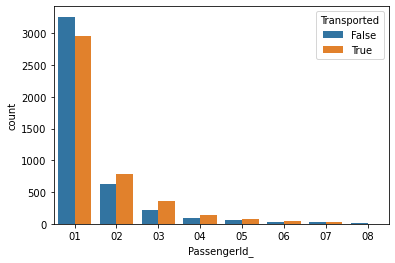

In [15]:
sns.countplot(x = 'PassengerId_', hue = 'Transported', data = df)

In [16]:
df[df['Transported']== True]['PassengerId_'].value_counts()/df['PassengerId_'].value_counts()*100

01    47.595303
02    55.878187
03    61.821366
04    59.307359
05    54.687500
06    54.666667
07    50.000000
08    46.153846
Name: PassengerId_, dtype: float64

In [17]:
df.drop(['PassengerId','Name'],axis = 1,inplace=True)

In [18]:
df.drop('PassengerId_',axis = 1,inplace=True)

In [19]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [20]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [21]:
df[df['Cabin'].isnull() == False]['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8494, dtype: object

In [22]:
def func2(cabin):
    return cabin[0]
def func3(cabin):
    return cabin[2:-2]
def func4(cabin):
    return cabin[-1]

In [23]:
df[df['Cabin'].isnull() == False]['Cabin'].apply(func2).value_counts() 

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64

In [24]:
df[df['Cabin'].isnull() == False]['Cabin'].apply(func3).value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin, Length: 1817, dtype: int64

In [25]:
df[df['Cabin'].isnull() == False]['Cabin'].apply(func4).value_counts()

S    4288
P    4206
Name: Cabin, dtype: int64

In [26]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [27]:
numerical = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
categorical1 = ['HomePlanet','CryoSleep','Destination','VIP']

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imputer = SimpleImputer()
imputer.fit(df[numerical])
df[numerical] = imputer.transform(df[numerical])

In [30]:
imputer2 = SimpleImputer(strategy = "most_frequent")
imputer2.fit(df[categorical1])
df[categorical1] = imputer2.transform(df[categorical1])

In [31]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [32]:
df['Cabin'] = df['Cabin'].replace(np.nan, 'F/82/S')

In [33]:
df['Cabin1'] = df['Cabin'].apply(func2)
df['Cabin2'] = df['Cabin'].apply(func4)

In [34]:
df.drop('Cabin',axis = 1,inplace = True)

In [35]:
df['Transported'] = df['Transported'].replace([True,False],[1,0])

In [36]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,Cabin2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,S


In [37]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Cabin1', ylabel='count'>

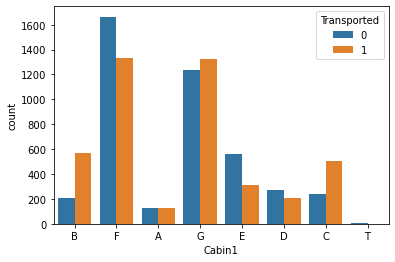

In [38]:
sns.countplot(x = 'Cabin1',hue = 'Transported',data = df)

In [39]:
cat2 = ['HomePlanet','Destination','CryoSleep','VIP','Cabin1','Cabin2']

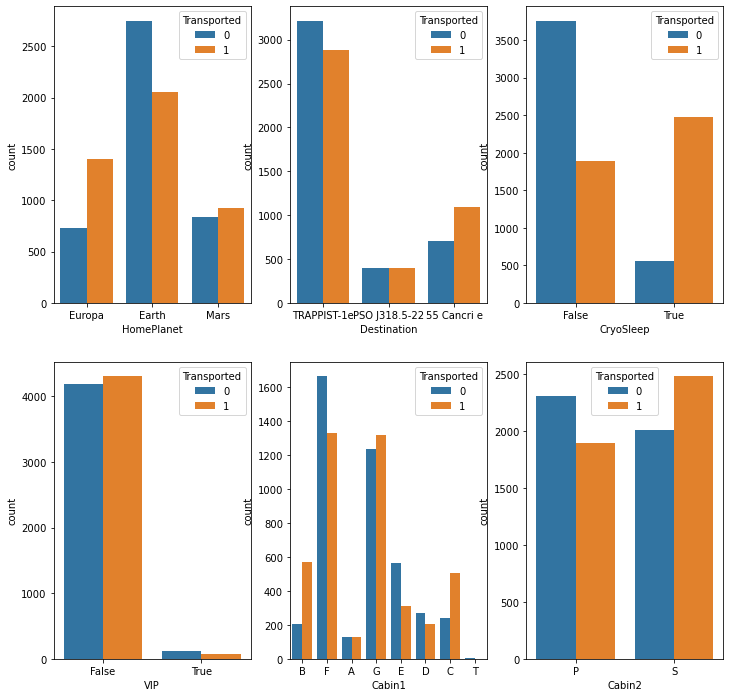

In [40]:
fig,axes = plt.subplots(2,3,figsize = (12,12))
for ax,feature in zip(axes.flatten(),cat2):
    sns.countplot(x = feature,ax=ax,hue = 'Transported',data = df)

In [41]:
for cat in cat2:
    print(df[cat].value_counts()/df.shape[0]*100)
    print('\n')

Earth     55.251352
Europa    24.513977
Mars      20.234672
Name: HomePlanet, dtype: float64


TRAPPIST-1e      70.136892
55 Cancri e      20.706315
PSO J318.5-22     9.156793
Name: Destination, dtype: float64


False    65.063844
True     34.936156
Name: CryoSleep, dtype: float64


False    97.710802
True      2.289198
Name: VIP, dtype: float64


F    34.430001
G    29.437478
E    10.077074
B     8.961233
C     8.593121
D     5.498677
A     2.944898
T     0.057518
Name: Cabin1, dtype: float64


S    51.616243
P    48.383757
Name: Cabin2, dtype: float64




In [42]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,Cabin2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,S


In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
ohe = OneHotEncoder(drop='first')

In [45]:
arr = ohe.fit_transform(df[['HomePlanet','CryoSleep','Destination','VIP','Cabin2']]).toarray()

In [46]:
df_new = pd.DataFrame(arr)

In [47]:
df = pd.concat([df,df_new],axis = 1)

In [48]:
df.drop(['HomePlanet','CryoSleep','Destination','VIP','Cabin2'],axis = 1, inplace = True)

In [49]:
df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,0,1,2,3,4,5,6
0,39.0,0.0,0.0,0.0,0.0,0.0,0,B,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,F,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,A,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,A,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,F,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,A,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,G,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,G,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,E,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
dict_1 = df.groupby(['Cabin1'])['Transported'].mean().to_dict()

In [51]:
df['Cabin1'] = df['Cabin1'].map(dict_1)

In [52]:
df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,0,1,2,3,4,5,6
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0.734275,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0.444036,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0.496094,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0.496094,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0.444036,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0.496094,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0.516217,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0.516217,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,0.357306,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
from lightgbm import LGBMClassifier

In [54]:
from xgboost import XGBClassifier

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
pipe = Pipeline([('classifier',XGBClassifier())])

In [59]:
grid_param = [
    {'classifier':[XGBClassifier()],
              'classifier__n_estimators':[50,100,200],
              'classifier__max_depth':[1,3,5],
              'classifier__learning_rate':[0.1,0.3,1]           
    },    
    {'classifier':[LGBMClassifier()],
              'classifier__n_estimators':[50,100,200],
              'classifier__learning_rate':[0.03,0.1,0.3]   
    }
    
]

In [60]:
GScv2 = GridSearchCV(pipe,param_grid=grid_param,cv=5)

In [61]:
GScv2.fit(df.drop(['Transported'],axis=1),df['Transported'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning...
                                                       n_estimators=100,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       predictor=None,
                                                       random_state=None,
                                                       reg_alpha=None,
                                                       reg_lambda=None, ...)],
                          'classifier__learning_rate': [0.1, 0.3, 1],
                          'classifier__max_depth': [1, 3, 5],
                          'classifier__n_estimators': [50, 100, 200]},
                         {'classifier': [LGBMClassifier()],
                          'classifier__learning_rate': [0.03, 0.1, 0.3],
                          'classifier__n_estimators': [50, 100, 200]}])

In [62]:
GScv2.best_params_

{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, random_state=None,
               reg_alpha=None, reg_lambda=None, ...),
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

# checkclose

In [63]:
df_test  = pd.read_csv('test.csv')

In [64]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [65]:
df_test[numerical] = imputer.transform(df_test[numerical])
df_test[categorical1] = imputer2.transform(df_test[categorical1])

In [66]:
df_test.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [67]:
df_test['Cabin'] = df_test['Cabin'].replace(np.nan, 'F/82/S')
df_test['Cabin1'] = df_test['Cabin'].apply(func2)
df_test['Cabin2'] = df_test['Cabin'].apply(func4)

In [68]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin1,Cabin2
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S


In [69]:
arr = ohe.transform(df_test[['HomePlanet','CryoSleep','Destination','VIP','Cabin2']]).toarray()
df_new = pd.DataFrame(arr)
df_test = pd.concat([df_test,df_new],axis = 1)
df_test.drop(['HomePlanet','CryoSleep','Destination','VIP','Cabin2'],axis = 1, inplace = True)

In [70]:
df_test.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin1,0,1,2,3,4,5,6
0,0013_01,G/3/S,27.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0018_01,F/4/S,19.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0019_01,C/0/S,31.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0021_01,C/1/S,38.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0023_01,F/5/S,20.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [71]:
df_test['Cabin1'] = df_test['Cabin1'].map(dict_1)

In [72]:
df_test.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin1,0,1,2,3,4,5,6
0,0013_01,G/3/S,27.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.516217,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0018_01,F/4/S,19.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.444036,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0019_01,C/0/S,31.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.680054,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0021_01,C/1/S,38.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.680054,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0023_01,F/5/S,20.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0.444036,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [73]:
pred = GScv2.predict(df_test.drop(['Cabin','PassengerId','Name'],axis=1))

In [74]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [75]:
sub =  pd.DataFrame(df_test['PassengerId'])

In [76]:
sub['Transported'] = pd.DataFrame(pred,columns = ['Transported']).replace([0,1],[False,True])

In [77]:
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [78]:
sub.to_csv('submission.csv',index = False)